In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
from math import cos, asin, sqrt, pi
import folium
# Input data files are available in the "

In [2]:
earth = 6378
m = (1 / ((2 * math.pi / 360) * earth)) / 1000

In [3]:
data = pd.read_json('amenities-vancouver.json.gz', lines=True)
data = data.drop(['timestamp','tags'], axis=1)
data = data.dropna()
# data

In [4]:
#https://stackoverflow.com/questions/7477003/calculating-new-longitude-latitude-from-old-n-meters
#rand_position_lon = np.random.uniform(data['lon'].min(), data['lon'].max())
#print(rand_position_lon)
#rand_position_lat = np.random.uniform(data['lat'].min(), data['lat'].max())
#print(rand_position_lat)

#x = rand_position_lon + ((5000 * m)/math.cos(rand_position_lat*(math.pi/180)))

#y = rand_position_lat + (5000 * m)  


#x2 = rand_position_lon - ((5000 * m)/math.cos(rand_position_lat*(math.pi/180)))
#y2 = rand_position_lat - (5000 * m)




x = -123.13500846976441 + ((3000 * m)/math.cos(49.18563055292021*(math.pi/180)))

y = 49.18563055292021 + (3000 * m)  


x2 = -123.13500846976441 - ((3000 * m)/math.cos(49.18563055292021*(math.pi/180)))
y2 = 49.18563055292021 - (3000 * m)

# print(x)
# print(y)
# print(x2)
# print(y2)

In [5]:
maxlat = data['lat'].max()
# print(maxlat)

minlat = data['lat'].min()
# print(minlat)

maxlon = data['lon'].max()
# print(maxlon)

minlon = data['lon'].min()
# print(minlon)

In [6]:
size  = data.loc[data['lon'] < x].reset_index(drop=True)
size = size.loc[size['lon'] > x2].reset_index(drop=True)
size = size.loc[size['lat'] < y].reset_index(drop=True)
size = size.loc[size['lat'] > y2].reset_index(drop=True)
# size

In [7]:
graph = size.groupby('amenity').count()
graph = graph.drop(['name','lon'], axis=1)
# graph

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text xticklabel objects>)

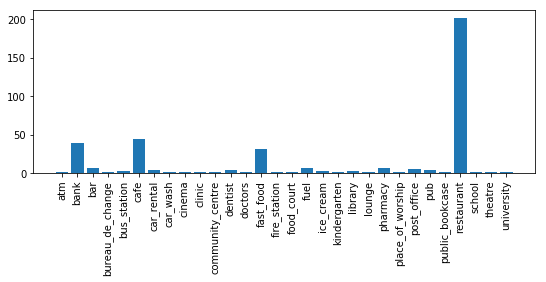

In [8]:
graph2 = graph.rename(columns={"lat":"Count"}).reset_index()
#objects = graph['amenity']
#y_pos = np.arange(len(objects))
#performance = graph['Count']
#plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.figure(figsize=(9, 3))
plt.bar(graph2['amenity'],graph2['Count'])
plt.xticks(rotation='vertical')

In [9]:
#M = input('What are you looking for?')
Final = size.loc[size['amenity'] == 'cafe']
output = Final.dropna().reset_index(drop=True)
# output

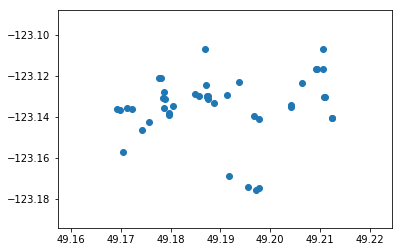

In [10]:
ax1 = plt.scatter(output['lat'],output['lon'])

In [11]:
# https://www.zhihu.com/question/33783546/answer/775946401
import folium
import pandas as pd

# define the world map
world_map = folium.Map()

# display world map
world_map

latitude = 49.2823254
longitude = -123.1187994

# Create map and display it
van_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Display the map of San Francisco
van_map

incidents = folium.map.FeatureGroup()

# add pop-up text to each marker on the map
latitudes = list(output.lat)
longitudes = list(output.lon)
labels = list(output.name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(van_map)    
    
# add incidents to map
van_map.add_child(incidents)